In [1]:
# Importing necessary libraries

import pandas as pd  # Pandas is used for data manipulation and analysis
import numpy as np  # NumPy is used for numerical operations, especially with arrays and matrices
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating static, interactive, and animated plots
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib
import warnings  # Warnings module to manage warning messages

# Importing functions and classes from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split  # Used to split the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # Logistic regression model for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble methods for classification

# Importing performance metrics for evaluating the models
from sklearn.metrics import (accuracy_score, precision_score, confusion_matrix, 
                             recall_score, f1_score)  # Various metrics to assess the performance of models

# Suppress warnings (for cleaner output)
warnings.filterwarnings('ignore')

# Set the maximum number of columns to display to 'None' so that all columns are shown when viewing DataFrames
pd.set_option('display.max_column', None)


In [2]:
# Loading the training dataset into a DataFrame
train = pd.read_csv('data/customer_churn_dataset-training-master.csv')  # Reads the training data from the specified CSV file

# Loading the testing dataset into a DataFrame
test = pd.read_csv('data/customer_churn_dataset-testing-master.csv')  # Reads the testing data from the specified CSV file


In [3]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
# Displaying concise information about the training DataFrame
train.info()  # Shows a summary of the DataFrame including column names, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
# Generating descriptive statistics for numerical columns in the training DataFrame
train.describe()  # Provides summary statistics such as mean, standard deviation, min, max, and percentiles for each numerical column


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
# Generating descriptive statistics for categorical (object type) columns in the training DataFrame
train.describe(include='O')  # Provides summary statistics like count, unique values, top (most frequent value), and frequency for object (categorical) columns


,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


Text(0.5, 1.0, 'Churn Distribution')

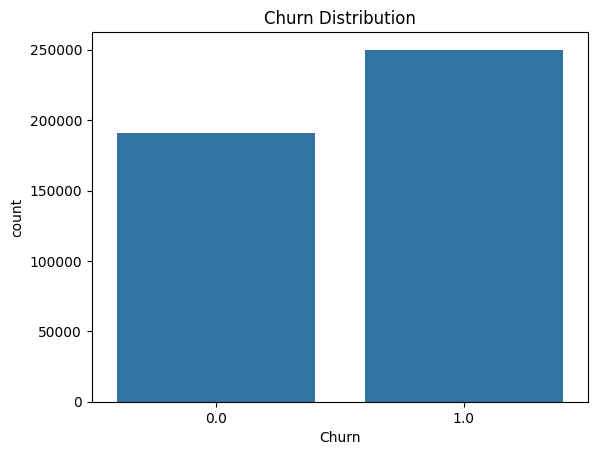

In [7]:
# Creating a count plot for the 'Churn' column to visualize the distribution of churned and non-churned customers
sns.countplot(data=train, x='Churn')  # Plots the counts of unique values in the 'Churn' column (e.g., yes/no or 1/0)
plt.title('Churn Distribution')

In [8]:
# Displaying the relative frequency of each unique value in the 'Churn' column as a proportion of the total
train['Churn'].value_counts(normalize=True)  # Returns the proportion (percentage) of churned vs. non-churned customers


Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64

In [9]:
# Checking for missing values in each column of the training DataFrame
train.isnull().sum()  # Returns the count of missing (null) values for each column in the DataFrame

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [10]:
# Filtering the rows in the training DataFrame that contain any missing values
train[train.isnull().any(axis=1)]  # Returns all rows where at least one column has a missing (NaN) value


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Removing rows with any missing values from the training DataFrame
train.dropna(inplace=True)  # Drops rows with missing values and modifies the DataFrame in place (i.e., without creating a new DataFrame)

In [12]:
# Identifying continuous variables: numerical columns with more than 20 unique values, excluding 'CustomerID'
continous = [var for var in train.columns if train[var].dtypes != 'object' and train[var].nunique() > 20 and var != 'CustomerID']
# Explanation:
# - `train[var].dtypes != 'object'` ensures the column is numerical.
# - `train[var].nunique() > 20` checks if the column has more than 20 unique values, indicating it is continuous.
# - `var != 'CustomerID'` excludes the 'CustomerID' column from the continuous variables list.

# Identifying discrete variables: numerical columns with 20 or fewer unique values, excluding 'Churn'
discreet = [var for var in train.columns if train[var].dtypes != 'object' and train[var].nunique() <= 20 and var != 'Churn']
# Explanation:
# - `train[var].dtypes != 'object'` ensures the column is numerical.
# - `train[var].nunique() <= 20` checks if the column has 20 or fewer unique values, indicating it is discrete.
# - `var != 'Churn'` excludes the 'Churn' column from the discrete variables list.

# Identifying categorical variables: columns with object (string) data types
categorical = train.select_dtypes(include='O').columns
# Explanation:
# - `train.select_dtypes(include='O')` selects columns with data type 'object', which are typically categorical.
# - `.columns` extracts the column names of these categorical variables.

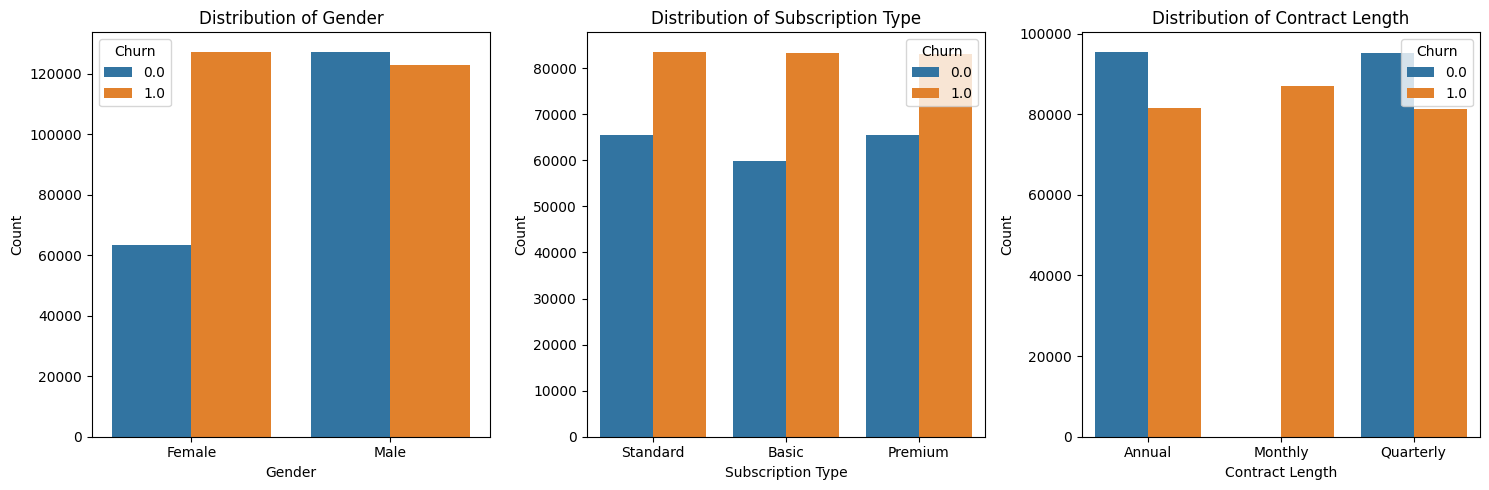

In [13]:
# Creating subplots to visualize the distribution of each categorical variable with respect to 'Churn'
fig, axes = plt.subplots(nrows=1, ncols=len(categorical), figsize=(15, 5))
# Explanation:
# - `nrows=1` creates a single row of subplots.
# - `ncols=len(categorical)` creates one subplot for each categorical variable.
# - `figsize=(15, 5)` sets the overall size of the figure.

# Looping through each categorical variable to create a count plot
for i, col in enumerate(categorical): 
    # Creating a count plot for each categorical variable with 'Churn' as the hue to show distribution
    sns.countplot(x=col, hue='Churn', ax=axes[i], data=train)
    # Setting the title for each subplot
    axes[i].set_title(f'Distribution of {col}')
    # Setting the x-axis label for each subplot
    axes[i].set_xlabel(col)
    # Setting the y-axis label for each subplot
    axes[i].set_ylabel('Count')

# Adjusting layout to prevent overlap of subplots
plt.tight_layout()


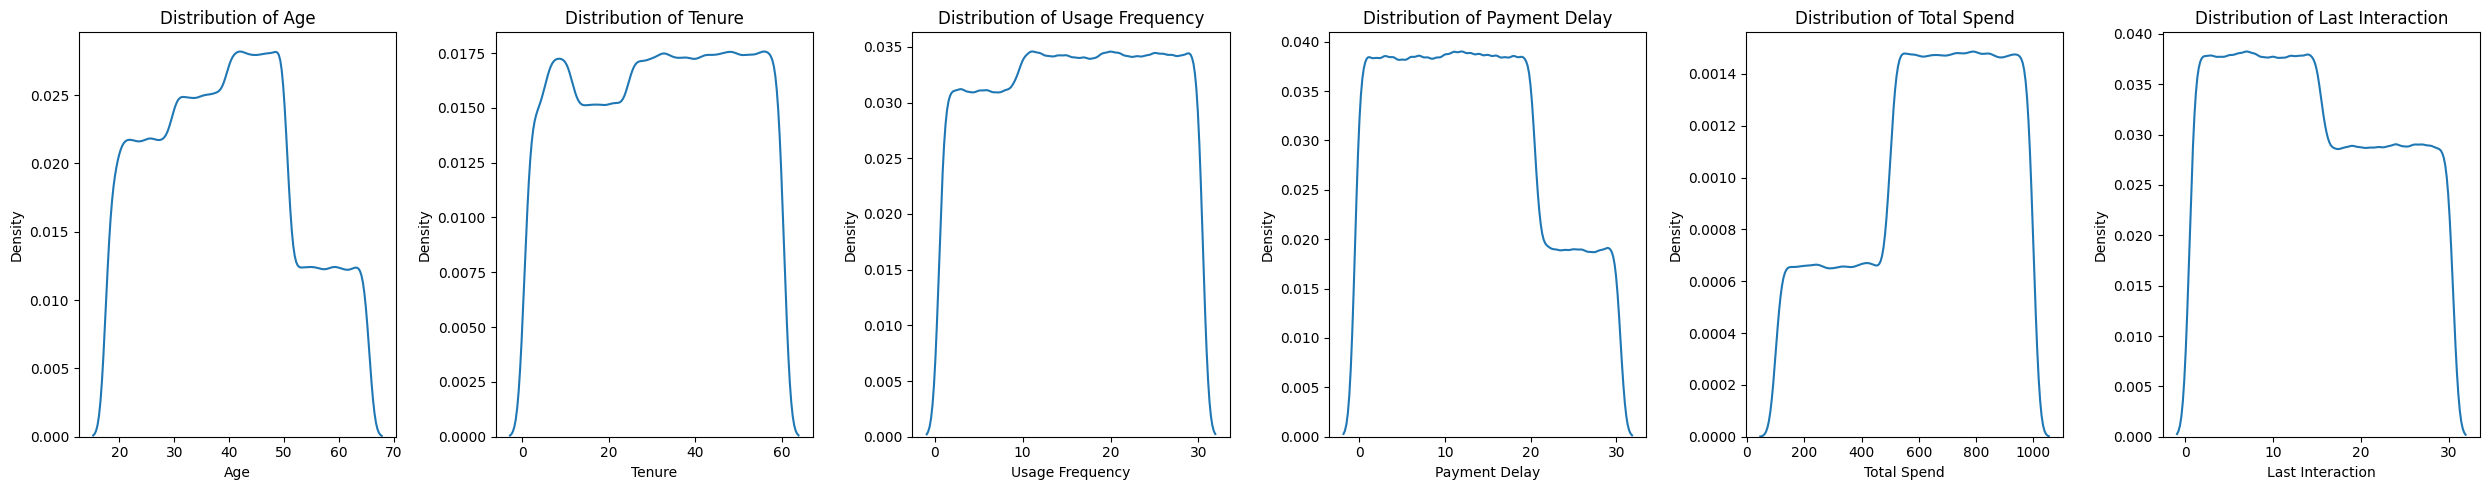

In [14]:
# Creating subplots to visualize the distribution of each continuous variable using KDE plots
fig, axes = plt.subplots(nrows=1, ncols=len(continous), figsize=(25, 5))
# Explanation:
# - `nrows=1` creates a single row of subplots.
# - `ncols=len(continous)` creates one subplot for each continuous variable.
# - `figsize=(25, 5)` sets the size of the figure to accommodate all the subplots.

# Looping through each continuous variable to create a KDE plot
for i, col in enumerate(continous):
    # Creating a KDE plot for each continuous variable to show its distribution
    sns.kdeplot(x=col, data=train, ax=axes[i])
    # Setting the title for each subplot
    axes[i].set_title(f'Distribution of {col}')
    # Setting the x-axis label for each subplot
    axes[i].set_xlabel(col)

# Adjusting layout to prevent overlap of subplots
plt.tight_layout()


<Axes: >

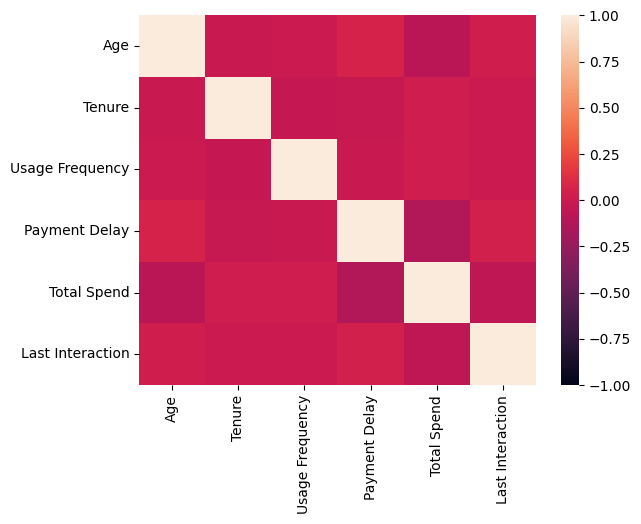

In [15]:
# Creating a heatmap to visualize the correlation matrix of continuous variables
sns.heatmap(train[continous].corr(), fmt='.2f', vmin=-1, vmax=1)
# Explanation:
# - `train[continous].corr()` computes the correlation matrix for continuous variables.
# - `fmt='.2f'` formats the correlation coefficients to two decimal places.
# - `vmin=-1` and `vmax=1` set the limits of the color scale to range from -1 to 1, which are the possible values for correlation coefficients.


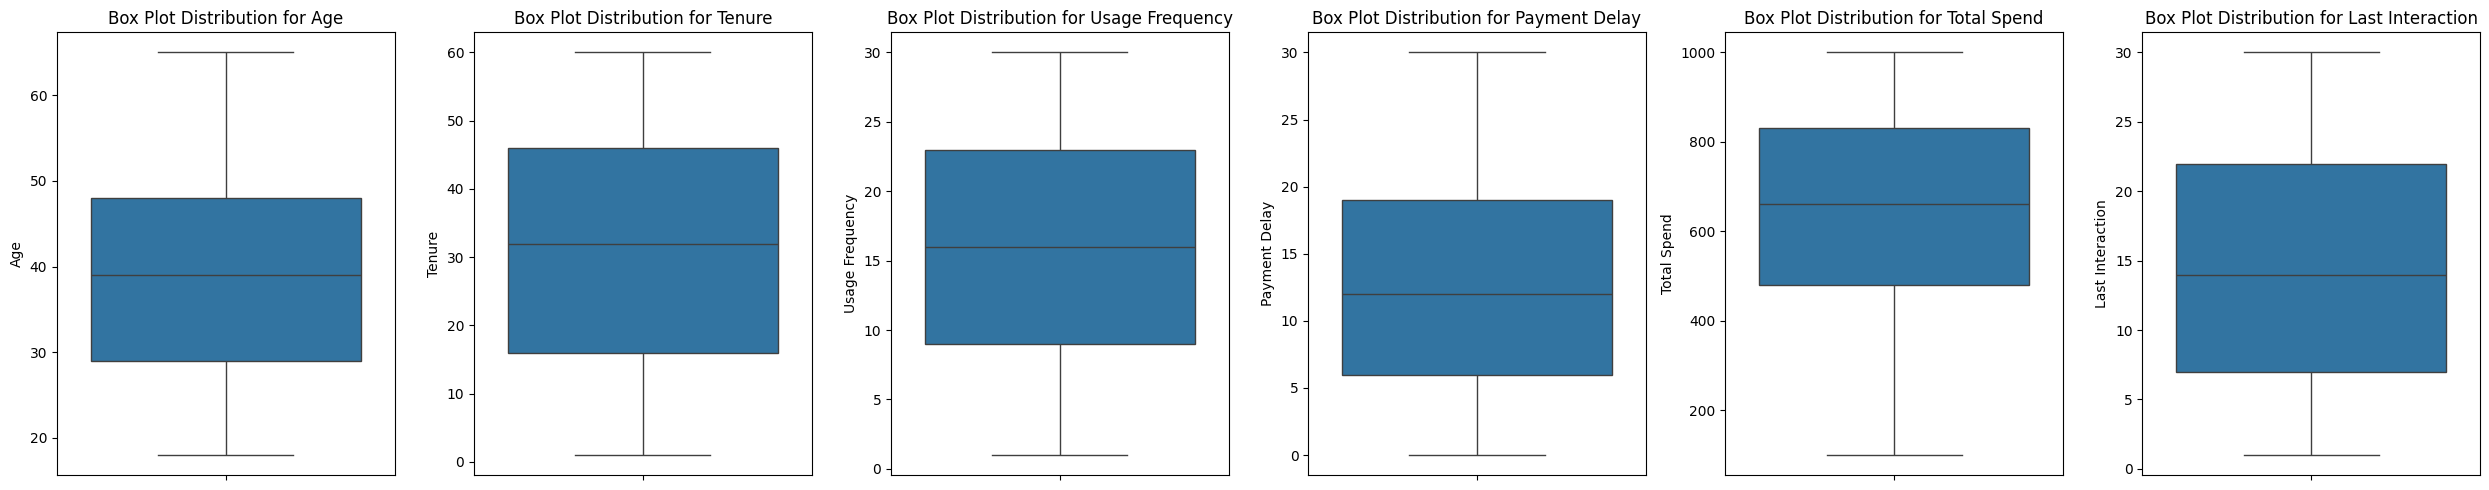

In [16]:
# Creating subplots to visualize the distribution of each continuous variable using box plots
fig, axes = plt.subplots(nrows=1, ncols=len(continous), figsize=(25, 5))
# Explanation:
# - `nrows=1` creates a single row of subplots.
# - `ncols=len(continous)` creates one subplot for each continuous variable.
# - `figsize=(25, 5)` sets the size of the figure to fit all subplots comfortably.

# Looping through each continuous variable to create a box plot
for i, col in enumerate(continous):
    # Creating a box plot for each continuous variable to show its distribution and identify potential outliers
    sns.boxplot(y=col, data=train, ax=axes[i])
    # Setting the title for each subplot
    axes[i].set_title(f'Box Plot Distribution for {col}')

# Adjusting layout to prevent overlap of subplots
plt.tight_layout()


In [17]:
# Copying the list of categorical column names into a new variable
cat_col = categorical.copy()
# Explanation:
# - `categorical.copy()` creates a copy of the list of categorical column names.
# - `categorical` is assumed to be a list or index object containing the names of categorical columns in the dataset.
# - The `.copy()` method ensures that `cat_col` is a separate list from `categorical`, allowing independent modifications to either list without affecting the other.


In [18]:
cat_col

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [19]:
# Assuming you want to remove a specific value from the list `cat_col`
# For example, if you want to remove the value 'Subscription Type'
cat_col.delete([1])
# Explanation:
# - `cat_col.delete('Subscription Type')` delete Subscription Type the first occurrence of the specified value from the list.
# - If the value is not found, a `ValueError` will be raised.

Index(['Gender', 'Contract Length'], dtype='object')

In [20]:
train['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [21]:
# Mapping subscription type categories to numerical values in the training dataset
train['Subscription Type'] = train['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
# Explanation:
# - `map({'Basic': 0, 'Standard': 1, 'Premium': 2})` replaces 'Basic' with 0, 'Standard' with 1, and 'Premium' with 2 in the 'Subscription Type' column.
# - This converts the categorical values into numerical format for use in machine learning models.

# Mapping subscription type categories to numerical values in the testing dataset
test['Subscription Type'] = test['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
# Explanation:
# - The same mapping is applied to the 'Subscription Type' column in the testing dataset.
# - Consistent numerical encoding ensures that the model trained on the training dataset can properly interpret the subscription types in the test dataset.

In [22]:
# Applying one-hot encoding to the training dataset to convert categorical variables into dummy/indicator variables
train = pd.get_dummies(train, dtype=int)
# Explanation:
# - `pd.get_dummies(train)` converts categorical columns in the training DataFrame into dummy/indicator variables.
# - Each category in a categorical column is converted into a new binary column (0 or 1), representing the presence or absence of that category.
# - `dtype=int` ensures that the resulting dummy variables are of integer type.

# Applying one-hot encoding to the testing dataset to convert categorical variables into dummy/indicator variables
test = pd.get_dummies(test, dtype=int)
# Explanation:
# - The same transformation is applied to the testing DataFrame.
# - This ensures that categorical variables are encoded similarly to how they are in the training set.


In [23]:
# Separating the features and target variable from the training dataset

# Dropping the 'CustomerID' and 'Churn' columns to get the feature set
X = train.drop(labels=['CustomerID', 'Churn'], axis=1)
# Explanation:
# - `train.drop(labels=['CustomerID', 'Churn'], axis=1)` removes the 'CustomerID' and 'Churn' columns from the training DataFrame.
# - `axis=1` specifies that columns (not rows) are being dropped.
# - The resulting DataFrame `X` contains all features used for model training.

# Extracting the 'Churn' column as the target variable
y = train['Churn']
# Explanation:
# - `train['Churn']` selects the 'Churn' column, which contains the target variable we want to predict.
# - This column is assigned to `y`, which will be used as the output variable in model training.

In [24]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.2)
# Explanation:
# - `X` and `y` are the feature set and target variable, respectively.
# - `train_test_split()` is a function from `sklearn.model_selection` used to split the data.
# - `random_state=15` ensures reproducibility by setting a seed for the random number generator.
# - `test_size=0.2` specifies that 20% of the data should be reserved for testing, while 80% is used for training.
# - `x_train` and `y_train` are the features and target variables for the training set.
# - `x_test` and `y_test` are the features and target variables for the testing set.

Train Logistic Regression Accuracy Score : 0.8805013256206314
Test Logistic Regression Accuracy Score : 0.8813615071398596
Logistic Regression Precision Score : 0.9045339225795892
Logistic Regression Recall Score : 0.8841292696584273
Logistic Regression F1 Score : 0.8942152103559871


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

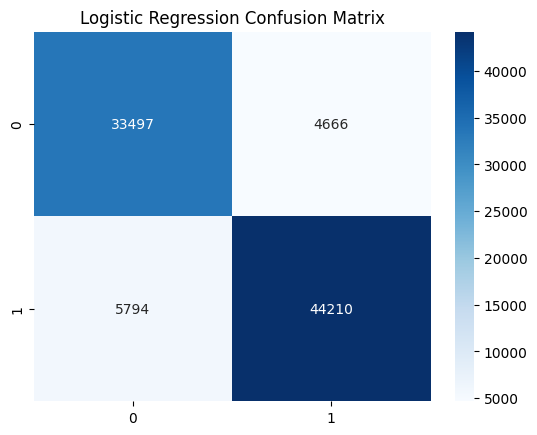

In [25]:
# Initializing and training the logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)  # Fits the logistic regression model on the training data

# Making predictions on the test set
y_pred = logreg.predict(x_test)  # Predicts the target variable for the test set

# Printing performance metrics for both training and testing sets
print(f'Train Logistic Regression Accuracy Score : {accuracy_score(y_train, logreg.predict(x_train))}')
# Explanation:
# - `accuracy_score(y_train, logreg.predict(x_train))` computes the accuracy score on the training data.
# - Accuracy measures the proportion of correctly predicted instances out of the total instances.

print(f'Test Logistic Regression Accuracy Score : {accuracy_score(y_test, logreg.predict(x_test))}')
# Explanation:
# - `accuracy_score(y_test, logreg.predict(x_test))` computes the accuracy score on the test data.

print(f'Logistic Regression Precision Score : {precision_score(y_test, logreg.predict(x_test))}')
# Explanation:
# - `precision_score(y_test, logreg.predict(x_test))` calculates the precision of the model on the test set.
# - Precision measures the proportion of true positive predictions among all positive predictions made by the model.

print(f'Logistic Regression Recall Score : {recall_score(y_test, logreg.predict(x_test))}')
# Explanation:
# - `recall_score(y_test, logreg.predict(x_test))` calculates the recall of the model on the test set.
# - Recall measures the proportion of true positive predictions among all actual positive instances in the test set.

print(f'Logistic Regression F1 Score : {f1_score(y_test, logreg.predict(x_test))}')
# Explanation:
# - `f1_score(y_test, logreg.predict(x_test))` calculates the F1 score of the model on the test set.
# - F1 score is the harmonic mean of precision and recall, providing a single metric that balances both aspects.

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
# Explanation:
# - `confusion_matrix(y_test, y_pred)` computes the confusion matrix for the test set predictions.
# - `annot=True` adds the numerical values to the heatmap for better readability.
# - `cmap='Blues'` sets the color map for the heatmap to shades of blue.
# - `fmt='d'` formats the annotations as integers.
plt.title('Logistic Regression Confusion Matrix')  # Sets the title of the plot


Train Decision Tree Accuracy Score : 1.0
Test Decision Tree Accuracy Score : 0.999897920990847
Decision Tree Precision Score : 0.999979998799928
Decision Tree Recall Score : 0.999840012798976
Decision Tree F1 Score : 0.999910000899991


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

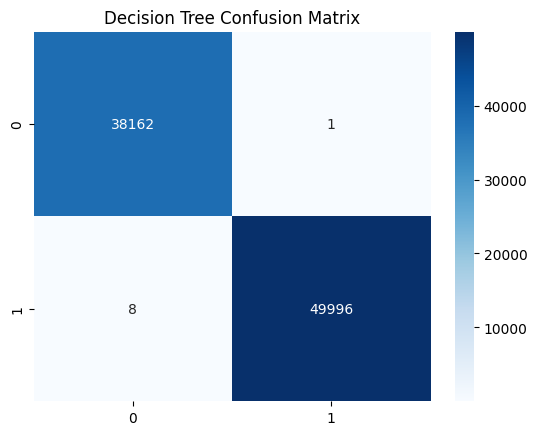

In [26]:
# Initializing and training the Decision Tree classifier
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)  # Fits the Decision Tree model on the training data

# Making predictions on the test set
y_pred = decision.predict(x_test)  # Predicts the target variable for the test set

# Printing performance metrics for both training and testing sets
print(f'Train Decision Tree Accuracy Score : {accuracy_score(y_train, decision.predict(x_train))}')
# Explanation:
# - `accuracy_score(y_train, decision.predict(x_train))` computes the accuracy score on the training data.
# - Accuracy measures the proportion of correctly predicted instances out of the total instances.

print(f'Test Decision Tree Accuracy Score : {accuracy_score(y_test, decision.predict(x_test))}')
# Explanation:
# - `accuracy_score(y_test, decision.predict(x_test))` computes the accuracy score on the test data.

print(f'Decision Tree Precision Score : {precision_score(y_test, decision.predict(x_test))}')
# Explanation:
# - `precision_score(y_test, decision.predict(x_test))` calculates the precision of the model on the test set.
# - Precision measures the proportion of true positive predictions among all positive predictions made by the model.

print(f'Decision Tree Recall Score : {recall_score(y_test, decision.predict(x_test))}')
# Explanation:
# - `recall_score(y_test, decision.predict(x_test))` calculates the recall of the model on the test set.
# - Recall measures the proportion of true positive predictions among all actual positive instances in the test set.

print(f'Decision Tree F1 Score : {f1_score(y_test, decision.predict(x_test))}')
# Explanation:
# - `f1_score(y_test, decision.predict(x_test))` calculates the F1 score of the model on the test set.
# - F1 score is the harmonic mean of precision and recall, providing a single metric that balances both aspects.

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
# Explanation:
# - `confusion_matrix(y_test, y_pred)` computes the confusion matrix for the test set predictions.
# - `annot=True` adds numerical values to the heatmap for better readability.
# - `cmap='Blues'` sets the color map for the heatmap to shades of blue.
# - `fmt='d'` formats the annotations as integers.
plt.title('Decision Tree Confusion Matrix')  # Sets the title of the plot


Train Random Forest Accuracy Score : 1.0
Test Random Forest Accuracy Score : 0.999432894393594
Random Forest Precision Score : 0.9999599663717522
Random Forest Recall Score : 0.9990400767938565
Random Forest F1 Score : 0.9994998099277725


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

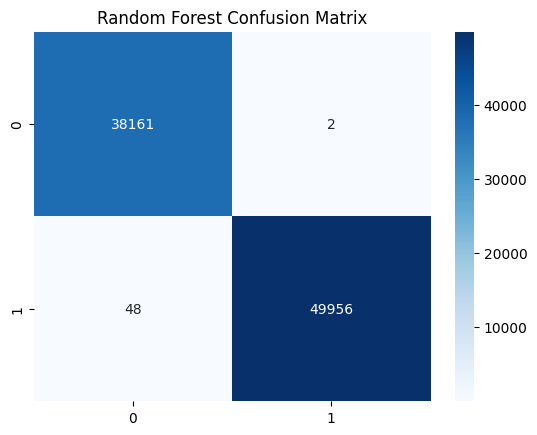

In [27]:
# Initializing and training the Random Forest classifier
random = RandomForestClassifier()
random.fit(x_train, y_train)  # Fits the Random Forest model on the training data

# Making predictions on the test set
y_pred = random.predict(x_test)  # Predicts the target variable for the test set

# Printing performance metrics for both training and testing sets
print(f'Train Random Forest Accuracy Score : {accuracy_score(y_train, random.predict(x_train))}')
# Explanation:
# - `accuracy_score(y_train, random.predict(x_train))` computes the accuracy score on the training data.
# - Accuracy measures the proportion of correctly predicted instances out of the total instances.

print(f'Test Random Forest Accuracy Score : {accuracy_score(y_test, random.predict(x_test))}')
# Explanation:
# - `accuracy_score(y_test, random.predict(x_test))` computes the accuracy score on the test data.

print(f'Random Forest Precision Score : {precision_score(y_test, random.predict(x_test))}')
# Explanation:
# - `precision_score(y_test, random.predict(x_test))` calculates the precision of the model on the test set.
# - Precision measures the proportion of true positive predictions among all positive predictions made by the model.

print(f'Random Forest Recall Score : {recall_score(y_test, random.predict(x_test))}')
# Explanation:
# - `recall_score(y_test, random.predict(x_test))` calculates the recall of the model on the test set.
# - Recall measures the proportion of true positive predictions among all actual positive instances in the test set.

print(f'Random Forest F1 Score : {f1_score(y_test, random.predict(x_test))}')
# Explanation:
# - `f1_score(y_test, random.predict(x_test))` calculates the F1 score of the model on the test set.
# - F1 score is the harmonic mean of precision and recall, providing a single metric that balances both aspects.

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
# Explanation:
# - `confusion_matrix(y_test, y_pred)` computes the confusion matrix for the test set predictions.
# - `annot=True` adds numerical values to the heatmap for better readability.
# - `cmap='Blues'` sets the color map for the heatmap to shades of blue.
# - `fmt='d'` formats the annotations as integers.
plt.title('Random Forest Confusion Matrix')  # Sets the title of the plot



Train Random Forest Accuracy Score : 1.0
Test Random Forest Accuracy Score : 0.9995576576270033
Random Forest Precision Score : 0.9999599751846144
Random Forest Recall Score : 0.9992600591952644
Random Forest F1 Score : 0.9996098946715614


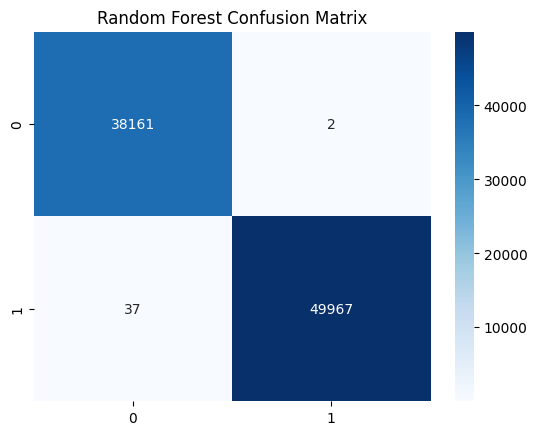

In [28]:
# Initializing the Random Forest classifier
random = RandomForestClassifier()

# Training the Random Forest model on the training data
random.fit(x_train, y_train)  
# Explanation:
# - `RandomForestClassifier()` creates a new instance of the Random Forest classifier.
# - `fit(x_train, y_train)` trains the model using the training features (`x_train`) and target values (`y_train`).

# Making predictions on the test set
y_pred = random.predict(x_test)  
# Explanation:
# - `predict(x_test)` generates predictions for the test set based on the trained model.

# Printing performance metrics for both training and testing sets
print(f'Train Random Forest Accuracy Score : {accuracy_score(y_train, random.predict(x_train))}')
# Explanation:
# - `accuracy_score(y_train, random.predict(x_train))` calculates and prints the accuracy score on the training data.
# - Accuracy measures the proportion of correctly predicted instances out of the total instances in the training set.

print(f'Test Random Forest Accuracy Score : {accuracy_score(y_test, random.predict(x_test))}')
# Explanation:
# - `accuracy_score(y_test, random.predict(x_test))` calculates and prints the accuracy score on the test data.
# - This provides an indication of how well the model performs on unseen data.

print(f'Random Forest Precision Score : {precision_score(y_test, random.predict(x_test))}')
# Explanation:
# - `precision_score(y_test, random.predict(x_test))` calculates and prints the precision score on the test data.
# - Precision measures the proportion of true positive predictions among all positive predictions made by the model.

print(f'Random Forest Recall Score : {recall_score(y_test, random.predict(x_test))}')
# Explanation:
# - `recall_score(y_test, random.predict(x_test))` calculates and prints the recall score on the test data.
# - Recall measures the proportion of true positive predictions among all actual positive instances in the test set.

print(f'Random Forest F1 Score : {f1_score(y_test, random.predict(x_test))}')
# Explanation:
# - `f1_score(y_test, random.predict(x_test))` calculates and prints the F1 score on the test data.
# - F1 score is the harmonic mean of precision and recall, providing a single metric that balances both aspects of model performance.

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
# Explanation:
# - `confusion_matrix(y_test, y_pred)` computes the confusion matrix for the test set predictions.
# - `annot=True` adds numerical values to the heatmap for clarity.
# - `cmap='Blues'` sets the color map to shades of blue to visually differentiate between different values.
# - `fmt='d'` formats the annotations as integers.
plt.title('Random Forest Confusion Matrix')  # Sets the title for the confusion matrix plot
plt.show()  # Displays the plot


In [29]:
y_pred_proba = random.predict_proba(x_test)
y_pred_proba[:, 1]

array([1.  , 0.01, 1.  , ..., 1.  , 1.  , 1.  ])

In [30]:
y_pred_proba[1,0]

0.99